In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import pandas as pd 
import numpy as np 
from nltk.corpus import stopwords
from nltk import ngrams 
from nltk import word_tokenize 
import string 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics

In [36]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Semester 7\machine learning\Praktikum 1 Ahmad\ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [42]:
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion', 'Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


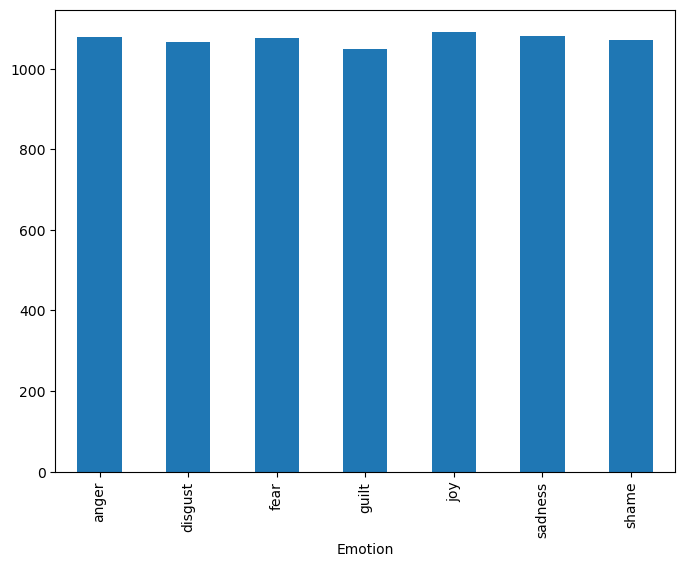

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure (figsize=(8,6))
new_df.groupby ('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [109]:
print(df.columns)


Index([0, 1, 2], dtype='int64')


In [270]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Fungsi untuk melakukan preprocessing pada DataFrame
def getTokenizedList(input_df):
    tokenizedList = []
    # Pastikan kolom yang ingin diakses adalah 'Text' atau sesuaikan dengan nama kolom yang benar
    for i in range(0, len(input_df['Text'])):
        # Ambil teks sebagai string, bukan Series
        curText = str(input_df['Text'].iloc[i]).replace('\n', '')
        # Melakukan tokenisasi pada teks
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)
    
    # Menghapus tanda baca
    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)
    for i in range(0, len(tokenizedList)):
        curList = tokenizedList[i]
        newList = []
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)

    # Stemming menggunakan Porter Stemmer
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0, len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)


    return tokenizedStemmed


In [272]:
new_df['Text'] = getTokenizedList(df)

In [274]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'], new_df['Emotion'], test_size=.3, random_state=1)

In [276]:
def returnPhrase(inputList):
    return inputList

In [278]:
#Extracting features for Naive Bayes
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [280]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

curAlpha = 0.33
NBClassifier = MultinomialNB(alpha=curAlpha)

# Pastikan tidak ada nilai None atau NaN di Y_train dan Y_test
Y_train = Y_train.fillna('default_label')  # Ganti 'default_label' dengan label yang sesuai
Y_test = Y_test.fillna('default_label')

# Jika tipe datanya salah, ubah tipe datanya ke string atau numerik
Y_train = Y_train.astype(str)
Y_test = Y_test.astype(str)

# Fit model
NBClassifier.fit(transformedTrain, Y_train)

# Predict
myPredTest = NBClassifier.predict(transformedTest)

# Print hasil akurasi
print('Best Acc naive Bayes')
print(np.sum(myPredTest == Y_test) / len(Y_test))


Best Acc naive Bayes
1.0


In [282]:
print ('metrics Classification Report : Naive Bayes')
print (metrics.classification_report(Y_test, myPredTest))

metrics Classification Report : Naive Bayes
               precision    recall  f1-score   support

default_label       1.00      1.00      1.00         1

     accuracy                           1.00         1
    macro avg       1.00      1.00      1.00         1
 weighted avg       1.00      1.00      1.00         1

